In [51]:
import os
import string
import random
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#from sklearn.metrics import f1_score

### Test LABELS for TOKENS in TEST Dataset against BERT Outputs

BERT Classifier has returned results for the tokens passed in 'test.tsv' file.  The returned values are probabilities, that need to be converted into equivalent class labels based on majority class.  Then, the class label should be compared against the actual label from the code above to extract the IO-Coding from the xml files.  This is a brute-force approach or a manual way of verifying the validity of the predictions


Read in results from BERT Predicitons to the above dataset
The above dataset is derived from IO-Coding applied as done on the training set. This is what should be based on the annotation process. Nowe, we have to read in the predictions from bert, which is a set of class probabilities across all 3 classes and we have to merget that with the above dataset for comparison and error analysis.

### Data File Names

* Test files with Labels and Filenames : /data_for_bert_sent/test_files_with_labels/*_testfile.csv
* Bert label mapping /data_for_bert_sent/test_files_with_labels/*_labelmapping.csv
* BERT evaluation /data_for_bert_sent/BERT_run_results/*_eval_results.txt


In [3]:
print(os.path.dirname(os.path.abspath('__file__')))

C:\Users\Kalyan\Documents\Anu\W266 - NLP\Final Project\lheart-disease-risk-prediction\Code


In [18]:
# read in the test files with labels

DI_test = pd.read_csv("data_for_bert_sent/test_files_with_labels/diabetes_ind_testfile.csv")

In [19]:
DI_test.head(10)

,Unnamed: 0,sentence,label,file
0,0,Record date: 2080-02-18,Other,110-03.xml
1,1,SDU JAR Admission Note,Other,110-03.xml
2,2,Name: \t Yosef Villegas,Other,110-03.xml
3,3,MR:\t8249813,Other,110-03.xml
4,4,DOA: \t2/17/80,Other,110-03.xml
5,5,PCP: Gilbert Perez,Other,110-03.xml
6,6,Attending: YBARRA,Other,110-03.xml
7,7,CODE: FULL,Other,110-03.xml
8,8,HPI: 70 yo M with NIDDM admitted for cath aft...,mention,110-03.xml
9,9,Pt has had increasing CP and SOB on exertion f...,Other,110-03.xml


In [6]:
# read in the test results captured for BERT Hypertension model and specify columns as the actual file has no header
bert_DI_results = pd.read_csv("data_for_bert_sent/BERT_run_results/sentence_based_diabetes_ind_results.tsv", sep='\t',header=None)
 
bert_DI_results.columns=["Class0", "Class1", "Class2", "Class3"]

In [7]:
bert_DI_results.head()

,Class0,Class1,Class2,Class3
0,0.000008,0.999957,0.000016,0.000020
1,0.000047,0.998924,0.000069,0.000960
2,0.000030,0.999731,0.000033,0.000207
3,0.000023,0.999789,0.000030,0.000157
4,0.000020,0.999833,0.000027,0.000120


In [8]:
bert_DI_results['predClass'] = bert_DI_results.idxmax(axis=1)

In [9]:
bert_DI_results.head()

,Class0,Class1,Class2,Class3,predClass
0,0.000008,0.999957,0.000016,0.000020,Class1
1,0.000047,0.998924,0.000069,0.000960,Class1
2,0.000030,0.999731,0.000033,0.000207,Class1
3,0.000023,0.999789,0.000030,0.000157,Class1
4,0.000020,0.999833,0.000027,0.000120,Class1


In [10]:
bert_DI_results['predClass'].value_counts()

Class1    34626
Class3      846
Class0       84
Name: predClass, dtype: int64

In [36]:
def DI_set_labels(classlabel):
    if (classlabel=='Class0'):
        return 'A1C'
    elif (classlabel=='Class2'):
        return 'glucose'
    elif (classlabel=='Class3'):
        return 'mention'
    else:
        return 'Other'

In [37]:
bert_DI_results['predLabel'] = bert_DI_results['predClass'].apply(DI_set_labels)
# bert_DI_results.drop('classLabel', 1, inplace=True)

bert_DI_results.head(10)


,Class0,Class1,Class2,Class3,predClass,predLabel
0,0.000008,0.999957,0.000016,0.000020,Class1,Other
1,0.000047,0.998924,0.000069,0.000960,Class1,Other
2,0.000030,0.999731,0.000033,0.000207,Class1,Other
3,0.000023,0.999789,0.000030,0.000157,Class1,Other
4,0.000020,0.999833,0.000027,0.000120,Class1,Other
5,0.000008,0.999956,0.000016,0.000019,Class1,Other
6,0.000008,0.999957,0.000015,0.000020,Class1,Other
7,0.000007,0.999955,0.000014,0.000023,Class1,Other
8,0.000599,0.005017,0.000355,0.994029,Class3,mention
9,0.000010,0.999951,0.000021,0.000018,Class1,Other


In [38]:
# validating the counts by label
bert_DI_results['predLabel'].value_counts()

Other      34626
mention      846
A1C           84
Name: predLabel, dtype: int64

In [39]:
DI_combined = pd.concat([DI_test, bert_DI_results], axis=1)

In [40]:
DI_combined.head()

,Unnamed: 0,sentence,label,file,Class0,Class1,Class2,Class3,predClass,predLabel
0,0,Record date: 2080-02-18,Other,110-03.xml,0.000008,0.999957,0.000016,0.000020,Class1,Other
1,1,SDU JAR Admission Note,Other,110-03.xml,0.000047,0.998924,0.000069,0.000960,Class1,Other
2,2,Name: \t Yosef Villegas,Other,110-03.xml,0.000030,0.999731,0.000033,0.000207,Class1,Other
3,3,MR:\t8249813,Other,110-03.xml,0.000023,0.999789,0.000030,0.000157,Class1,Other
4,4,DOA: \t2/17/80,Other,110-03.xml,0.000020,0.999833,0.000027,0.000120,Class1,Other


In [43]:
DI_combined[DI_combined['predLabel']!='Other']

,Unnamed: 0,sentence,label,file,Class0,Class1,Class2,Class3,predClass,predLabel
8,8,HPI: 70 yo M with NIDDM admitted for cath aft...,mention,110-03.xml,0.000599,0.005017,0.000355,0.994029,Class3,mention
19,19,Diabetes mellitus type 2,mention,110-03.xml,0.000503,0.008200,0.000377,0.990920,Class3,mention
75,75,DM,mention,110-03.xml,0.000553,0.006471,0.000435,0.992542,Class3,mention
105,105,Diabetes mellitus type 2,mention,110-04.xml,0.000503,0.008200,0.000377,0.990920,Class3,mention
183,183,"dependent diabetes mellitus, hypertension.",mention,111-01.xml,0.000509,0.007388,0.000372,0.991731,Class3,mention
220,220,patient is a 58-year-old male with a history o...,Other,111-02.xml,0.000532,0.026905,0.000399,0.972164,Class3,mention
221,221,diabetes who presents with fever and chills.,mention,111-02.xml,0.000496,0.009003,0.000384,0.990117,Class3,mention
291,291,He is 61 years old with previous history of di...,mention,111-03.xml,0.000608,0.006114,0.000357,0.992920,Class3,mention
345,345,"PAST MEDICAL HISTORY: Hypertension, diabetes,...",mention,111-04.xml,0.000517,0.006478,0.000368,0.992638,Class3,mention
426,426,"In addition, CAD, diabetes,",mention,113-04.xml,0.000501,0.008170,0.000378,0.990951,Class3,mention


In [44]:
DI_test_labels = DI_combined['label']
DI_pred_labels = DI_combined['predLabel']

print(type(DI_test_labels))

<class 'pandas.core.series.Series'>


In [45]:
accuracy_score(DI_test_labels, DI_pred_labels)

0.9921813477331534

In [46]:
print(classification_report(DI_pred_labels, DI_test_labels))

              precision    recall  f1-score   support

         A1C       0.66      0.71      0.69        84
       Other       1.00      1.00      1.00     34626
     glucose       0.00      0.00      0.00         0
     mention       0.92      0.85      0.88       846

   micro avg       0.99      0.99      0.99     35556
   macro avg       0.64      0.64      0.64     35556
weighted avg       0.99      0.99      0.99     35556



C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [47]:
print("Confusion Matrix \n", confusion_matrix(DI_test_labels, DI_pred_labels))

Confusion Matrix 
 [[   60    20     0    11]
 [   20 34503     0   119]
 [    0    43     0     1]
 [    4    60     0   715]]


In [96]:
unique_label = np.unique(DI_test_labels)
print(pd.DataFrame(confusion_matrix(DI_test_labels, DI_pred_labels, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

              pred:A1C  pred:Other  pred:glucose  pred:mention
true:A1C            60          20             0            11
true:Other          20       34503             0           119
true:glucose         0          43             0             1
true:mention         4          60             0           715


Confusion matrix, without normalization
[[   60    20     0    11]
 [   20 34503     0   119]
 [    0    43     0     1]
 [    4    60     0   715]]


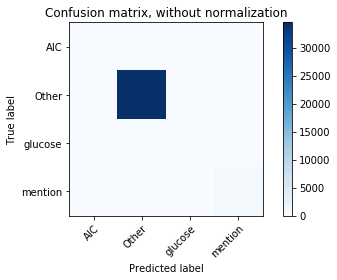

In [75]:
import numpy as np
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    return ax

plot_confusion_matrix(DI_test_labels, DI_pred_labels, ["AIC", "Other", "glucose", "mention"])
plt.show()

In [76]:
# read in the test files with labels

DT_test = pd.read_csv("data_for_bert_sent/test_files_with_labels/diabetes_time_testfile.csv")

In [77]:
DT_test.head(10)

,Unnamed: 0,sentence,label,file
0,0,Record date: 2080-02-18,Other,110-03.xml
1,1,SDU JAR Admission Note,Other,110-03.xml
2,2,Name: \t Yosef Villegas,Other,110-03.xml
3,3,MR:\t8249813,Other,110-03.xml
4,4,DOA: \t2/17/80,Other,110-03.xml
5,5,PCP: Gilbert Perez,Other,110-03.xml
6,6,Attending: YBARRA,Other,110-03.xml
7,7,CODE: FULL,Other,110-03.xml
8,8,HPI: 70 yo M with NIDDM admitted for cath aft...,before DCT,110-03.xml
9,9,Pt has had increasing CP and SOB on exertion f...,Other,110-03.xml


In [78]:
# read in the test results captured for BERT Hypertension model and specify columns as the actual file has no header
bert_DT_results = pd.read_csv("data_for_bert_sent/BERT_run_results/diabetes_time_test_results.tsv", sep='\t',header=None)
 
bert_DT_results.columns=["Class0", "Class1", "Class2", "Class3"]

In [79]:
bert_DT_results.head()

,Class0,Class1,Class2,Class3
0,0.999891,0.000017,0.000063,0.000030
1,0.990513,0.000495,0.008238,0.000754
2,0.999801,0.000025,0.000125,0.000048
3,0.999811,0.000024,0.000121,0.000044
4,0.999816,0.000024,0.000115,0.000045


In [80]:
bert_DT_results['predClass'] = bert_DT_results.idxmax(axis=1)

In [81]:
bert_DT_results.head()

,Class0,Class1,Class2,Class3,predClass
0,0.999891,0.000017,0.000063,0.000030,Class0
1,0.990513,0.000495,0.008238,0.000754,Class0
2,0.999801,0.000025,0.000125,0.000048,Class0
3,0.999811,0.000024,0.000121,0.000044,Class0
4,0.999816,0.000024,0.000115,0.000045,Class0


In [82]:
bert_DT_results['predClass'].value_counts()

Class0    34648
Class2      665
Class3      241
Class1        2
Name: predClass, dtype: int64

In [84]:
def DT_set_labels(classlabel):
    if (classlabel=='Class1'):
        return 'after DCT'
    elif (classlabel=='Class2'):
        return 'before DCT'
    elif (classlabel=='Class3'):
        return 'during DCT'
    else:
        return 'Other'

In [85]:
bert_DT_results['predLabel'] = bert_DT_results['predClass'].apply(DT_set_labels)

bert_DT_results.head(10)


,Class0,Class1,Class2,Class3,predClass,predLabel
0,0.999891,0.000017,0.000063,0.000030,Class0,Other
1,0.990513,0.000495,0.008238,0.000754,Class0,Other
2,0.999801,0.000025,0.000125,0.000048,Class0,Other
3,0.999811,0.000024,0.000121,0.000044,Class0,Other
4,0.999816,0.000024,0.000115,0.000045,Class0,Other
5,0.999917,0.000016,0.000039,0.000028,Class0,Other
6,0.999914,0.000015,0.000044,0.000027,Class0,Other
7,0.999914,0.000016,0.000042,0.000028,Class0,Other
8,0.008074,0.007655,0.975548,0.008723,Class2,before DCT
9,0.999917,0.000015,0.000040,0.000028,Class0,Other


In [86]:
# validating the counts by label
bert_DT_results['predLabel'].value_counts()

Other         34648
before DCT      665
during DCT      241
after DCT         2
Name: predLabel, dtype: int64

In [87]:
DT_combined = pd.concat([DT_test, bert_DT_results], axis=1)

In [88]:
DT_combined.head()

,Unnamed: 0,sentence,label,file,Class0,Class1,Class2,Class3,predClass,predLabel
0,0,Record date: 2080-02-18,Other,110-03.xml,0.999891,0.000017,0.000063,0.000030,Class0,Other
1,1,SDU JAR Admission Note,Other,110-03.xml,0.990513,0.000495,0.008238,0.000754,Class0,Other
2,2,Name: \t Yosef Villegas,Other,110-03.xml,0.999801,0.000025,0.000125,0.000048,Class0,Other
3,3,MR:\t8249813,Other,110-03.xml,0.999811,0.000024,0.000121,0.000044,Class0,Other
4,4,DOA: \t2/17/80,Other,110-03.xml,0.999816,0.000024,0.000115,0.000045,Class0,Other


In [89]:
DT_combined[DT_combined['predLabel']!='Other']

,Unnamed: 0,sentence,label,file,Class0,Class1,Class2,Class3,predClass,predLabel
8,8,HPI: 70 yo M with NIDDM admitted for cath aft...,before DCT,110-03.xml,0.008074,0.007655,0.975548,0.008723,Class2,before DCT
19,19,Diabetes mellitus type 2,after DCT,110-03.xml,0.031629,0.353589,0.092436,0.522347,Class3,during DCT
75,75,DM,before DCT,110-03.xml,0.010936,0.006663,0.973237,0.009164,Class2,before DCT
105,105,Diabetes mellitus type 2,after DCT,110-04.xml,0.031629,0.353589,0.092436,0.522347,Class3,during DCT
183,183,"dependent diabetes mellitus, hypertension.",before DCT,111-01.xml,0.011682,0.006661,0.971679,0.009978,Class2,before DCT
220,220,patient is a 58-year-old male with a history o...,Other,111-02.xml,0.187765,0.018285,0.764088,0.029862,Class2,before DCT
221,221,diabetes who presents with fever and chills.,before DCT,111-02.xml,0.011723,0.006605,0.971884,0.009788,Class2,before DCT
291,291,He is 61 years old with previous history of di...,before DCT,111-03.xml,0.010716,0.006372,0.973563,0.009349,Class2,before DCT
345,345,"PAST MEDICAL HISTORY: Hypertension, diabetes,...",before DCT,111-04.xml,0.010917,0.006390,0.973335,0.009358,Class2,before DCT
426,426,"In addition, CAD, diabetes,",after DCT,113-04.xml,0.011683,0.006389,0.972504,0.009424,Class2,before DCT


In [91]:
DT_test_labels = DT_combined['label']
DT_pred_labels = DT_combined['predLabel']

#print(type(DT_test_labels))

In [92]:
accuracy_score(DT_test_labels, DT_pred_labels)

0.9854314321070987

In [93]:
print(classification_report(DT_pred_labels, DT_test_labels))

              precision    recall  f1-score   support

       Other       1.00      1.00      1.00     34648
   after DCT       0.02      1.00      0.03         2
  before DCT       0.72      0.67      0.70       665
  during DCT       0.47      0.34      0.39       241

   micro avg       0.99      0.99      0.99     35556
   macro avg       0.55      0.75      0.53     35556
weighted avg       0.99      0.99      0.99     35556



In [94]:
print("Confusion Matrix \n", confusion_matrix(DT_test_labels, DT_pred_labels))

Confusion Matrix 
 [[34507     0   108    27]
 [    2     2    45    73]
 [  113     0   448    60]
 [   26     0    64    81]]


In [95]:
unique_label = np.unique(DT_test_labels)
print(pd.DataFrame(confusion_matrix(DT_test_labels, DT_pred_labels, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

                 pred:Other  pred:after DCT  pred:before DCT  pred:during DCT
true:Other            34507               0              108               27
true:after DCT            2               2               45               73
true:before DCT         113               0              448               60
true:during DCT          26               0               64               81


### Interpreting the predictions compared against actual test labels

As seen above, BERT predictions seem very accurate and it seems to predict only after it has seen the complete context.  Also, punctuation marks are not labeled as one of the relevant classes, although a human annotator has done based on the instructions provided as part of the annotation process.  